In [6]:
"""
Notebook Práctico: Proceso ETL con Datos de Ecobici de Buenos Aires
"""

# =============================================================================
# LIBRERÍAS
# =============================================================================
# Importamos las librerías que usaremos a lo largo del proceso.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io

print("Librerías importadas.")

Librerías importadas.


In [10]:
# =============================================================================
# FASE 1: EXTRACCIÓN (Extract)
# =============================================================================
print("\n--- FASE 1: EXTRACCIÓN ---")

# Vamos a extraer los datos de viajes de Ecobici de 2024.
# Fuente: Datos abiertos de la ciudad de Buenos Aires
# url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/recorridos-realizados-2024.zip"

# zip_file_name = "recorridos-realizados-2024.zip"
# csv_file_name = "badata_ecobici_recorridos_realizados_2024.csv"

# print(f"Descargando datos desde: {url}")
# try:
#     response = requests.get(url, timeout=1200) # Added a timeout of 600 seconds (10 minutes)
#     response.raise_for_status() # Raise an exception for bad status codes
#     print("Descarga completada con éxito.")
# except requests.exceptions.Timeout as e:
#     print(f"Error de timeout durante la descarga: {e}")
#     df_raw = pd.DataFrame()
# except requests.exceptions.RequestException as e:
#     print(f"Error durante la descarga: {e}")
#     df_raw = pd.DataFrame()

# Read the local CSV into a DataFrame
csv_file_path = "/content/2025-01.csv"
print(f"Leyendo datos desde: {csv_file_path}")
try:
    df_raw = pd.read_csv(csv_file_path)
    print("Extracción completada con éxito.")
    print(f"Se cargaron {df_raw.shape[0]} registros.")
except FileNotFoundError:
    print(f"Error: El archivo {csv_file_path} no se encontró.")
    df_raw = pd.DataFrame()
except Exception as e:
    print(f"Error al leer el archivo CSV: {e}")
    df_raw = pd.DataFrame()


--- FASE 1: EXTRACCIÓN ---
Leyendo datos desde: /content/2025-01.csv
Extracción completada con éxito.
Se cargaron 1809775 registros.


In [11]:
# Save the zip file locally
#with open(zip_file_name, 'wb') as f:
#    f.write(response.content)
#print(f"Archivo zip guardado como {zip_file_name}")

# Extract the specific CSV file
# with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
#     if csv_file_name in zip_ref.namelist():
#         zip_ref.extract(csv_file_name)
#         print(f"Archivo {csv_file_name} extraído.")
#     else:
#         print(f"Error: El archivo {csv_file_name} no se encontró dentro del zip.")
#         df_raw = pd.DataFrame()
#         raise FileNotFoundError(f"{csv_file_name} not found in zip")

# Read the extracted CSV into a DataFrame
# print(f"Leyendo datos desde: {csv_file_name}")
# df_raw = pd.read_csv(csv_file_name)
# print("Extracción completada con éxito.")
# print(f"Se cargaron {df_raw.shape[0]} registros.")

In [29]:
# Mostrar el tamaño del DataFrame (filas y columnas)
print("Tamaño del DataFrame:")
print(df_raw.shape)

# Mostrar una previsualización de los datos
print("\nPrevisualización del DataFrame:")
display(df_raw.head(50))

Tamaño del DataFrame:
(1809775, 9)

Previsualización del DataFrame:


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17
5,M,24.0,7579436,222,31/12/2024,23:34:33,483,01/01/2025,00:01:58
6,M,31.0,7161920,034,31/12/2024,23:25:47,688,01/01/2025,00:02:16
7,M,22.0,7220593,254,31/12/2024,23:50:20,539,01/01/2025,00:02:41
8,M,29.0,4031258,560,31/12/2024,23:52:11,120,01/01/2025,00:03:28
9,F,24.0,6463376,560,31/12/2024,23:51:50,120,01/01/2025,00:03:31


In [15]:
# =============================================================================
# FASE 2: TRANSFORMACIÓN (Transform)
# =============================================================================
print("\n--- FASE 2: TRANSFORMACIÓN ---")

# Hacemos una copia para no modificar el DataFrame original
df = df_raw.copy()

# --- 2.1 Limpieza de Datos (Cleaning) ---
print("\nIniciando limpieza de datos...")

# Mostrar tipos de datos antes de la transformación
print("\nTipos de datos antes de la conversión a datetime:")
print(df[['Fecha_Retiro', 'Hora_Retiro', 'Fecha_Arribo', 'Hora_Arribo']].dtypes)

# Convertir columnas de fecha y hora a formato datetime
# Combine date and hour columns and convert to datetime
df['Fecha_Hora_Retiro'] = pd.to_datetime(df['Fecha_Retiro'] + ' ' + df['Hora_Retiro'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df['Fecha_Hora_Arribo'] = pd.to_datetime(df['Fecha_Arribo'] + ' ' + df['Hora_Arribo'], format='%d/%m/%Y %H:%M:%S', errors='coerce')


print("\nColumnas de fecha y hora convertidas a datetime.")

# Mostrar tipos de datos despues de la transformación
print("\nTipos de datos despues de la conversión a datetime:")
print(df[['Fecha_Hora_Retiro', 'Fecha_Hora_Arribo']].dtypes)

# Mostrar una previsualización del DataFrame después de la conversión
print("\nPrevisualización del DataFrame después de la conversión:")
display(df.head())


--- FASE 2: TRANSFORMACIÓN ---

Iniciando limpieza de datos...

Tipos de datos antes de la conversión a datetime:
Fecha_Retiro    object
Hora_Retiro     object
Fecha_Arribo    object
Hora_Arribo     object
dtype: object

Columnas de fecha y hora convertidas a datetime.

Tipos de datos despues de la conversión a datetime:
Fecha_Hora_Retiro    datetime64[ns]
Fecha_Hora_Arribo    datetime64[ns]
dtype: object

Previsualización del DataFrame después de la conversión:


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Fecha_Hora_Retiro,Fecha_Hora_Arribo
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17


In [16]:
# Manejo de Valores Nulos (Imputación)
# Verificamos si hay nulos en columnas clave
print(f"Valores nulos en 'Ciclo_Estacion_Retiro': {df['Ciclo_Estacion_Retiro'].isnull().sum()}")
print(f"Valores nulos en 'Ciclo_EstacionArribo': {df['Ciclo_EstacionArribo'].isnull().sum()}")
print(f"Valores nulos en 'Fecha_Hora_Retiro': {df['Fecha_Hora_Retiro'].isnull().sum()}")
print(f"Valores nulos en 'Fecha_Hora_Arribo': {df['Fecha_Hora_Arribo'].isnull().sum()}")
print(f"Valores nulos en 'Bici': {df['Bici'].isnull().sum()}")

Valores nulos en 'Ciclo_Estacion_Retiro': 0
Valores nulos en 'Ciclo_EstacionArribo': 0
Valores nulos en 'Fecha_Hora_Retiro': 0
Valores nulos en 'Fecha_Hora_Arribo': 0
Valores nulos en 'Bici': 0


In [17]:
# Verificar valores nulos en todas las columnas
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())


Conteo de valores nulos por columna:
Genero_Usuario             1
Edad_Usuario             147
Bici                       0
Ciclo_Estacion_Retiro      0
Fecha_Retiro               0
Hora_Retiro                0
Ciclo_EstacionArribo       0
Fecha_Arribo               0
Hora_Arribo                0
Fecha_Hora_Retiro          0
Fecha_Hora_Arribo          0
dtype: int64



Visualización de la distribución de 'Genero_Usuario':

Conteo de viajes por género:
Genero_Usuario
M    1252895
F     502211
O      34432
?      20236
Name: count, dtype: int64


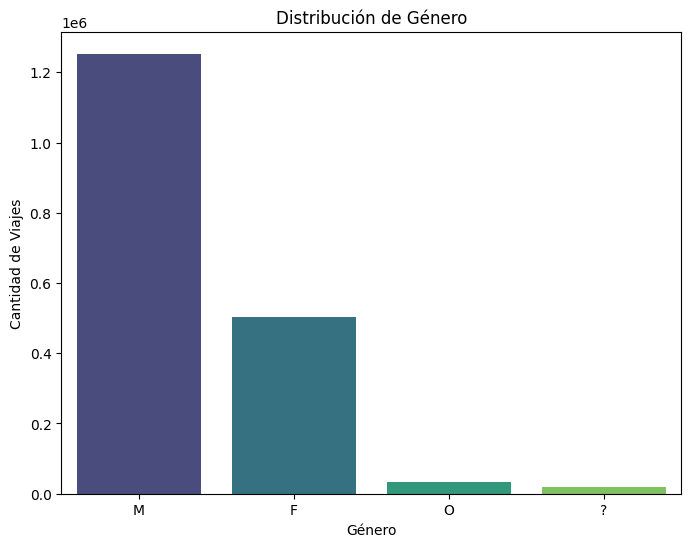

In [18]:
# Visualizar la distribución de la variable categórica 'Genero_Usuario'
print("\nVisualización de la distribución de 'Genero_Usuario':")

# Imprimir la cantidad de cada variable categórica en 'Genero_Usuario'
print("\nConteo de viajes por género:")
print(df['Genero_Usuario'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Genero_Usuario', palette='viridis', hue='Genero_Usuario', legend=False)
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Viajes')
plt.show()

In [19]:
# Imputar valores nulos en la columna 'Genero_Usuario' con la constante "OTHER"
df['Genero_Usuario'] = df['Genero_Usuario'].fillna("OTHER")
print("Valores nulos en la columna 'Genero_Usuario' imputados con 'OTHER'.")

# Verificar si aún quedan valores nulos en la columna 'Genero_Usuario'
print(f"Valores nulos restantes en 'Genero_Usuario': {df['Genero_Usuario'].isnull().sum()}")

Valores nulos en la columna 'Genero_Usuario' imputados con 'OTHER'.
Valores nulos restantes en 'Genero_Usuario': 0


In [20]:
# Imprimir la cantidad de cada variable categórica en 'Genero_Usuario'
print("\nConteo de viajes por género:")
print(df['Genero_Usuario'].value_counts())


Conteo de viajes por género:
Genero_Usuario
M        1252895
F         502211
O          34432
?          20236
OTHER          1
Name: count, dtype: int64


In [21]:
#En el caso de la variable fecha_destino_recorrido, la estrategia más simple
#es eliminar las filas con datos faltantes ya que es una porcion pequeña del dataset
df.dropna(subset=['Fecha_Hora_Arribo', 'Fecha_Hora_Retiro'], inplace=True)
print("Registros con fechas de retiro o arribo nulas eliminados.")
# Verificar valores nulos en todas las columnas
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())

Registros con fechas de retiro o arribo nulas eliminados.

Conteo de valores nulos por columna:
Genero_Usuario             0
Edad_Usuario             147
Bici                       0
Ciclo_Estacion_Retiro      0
Fecha_Retiro               0
Hora_Retiro                0
Ciclo_EstacionArribo       0
Fecha_Arribo               0
Hora_Arribo                0
Fecha_Hora_Retiro          0
Fecha_Hora_Arribo          0
dtype: int64


In [22]:
# Aplicar One-Hot Encoding a las columnas 'Genero_Usuario'
df_encoded = pd.get_dummies(df, columns=['Genero_Usuario'], prefix=['genero'])

# Mostrar las primeras filas del DataFrame codificado
print("\nDataFrame después de One-Hot Encoding:")
display(df_encoded.head())


DataFrame después de One-Hot Encoding:


,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Fecha_Hora_Retiro,Fecha_Hora_Arribo,genero_?,genero_F,genero_M,genero_O,genero_OTHER
0,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03,False,False,True,False,False
1,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41,False,True,False,False,False
2,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59,False,False,True,False,False
3,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08,False,False,True,False,False
4,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17,False,False,True,False,False


In [30]:
# --- Discretización ---
print("\nIniciando discretización de la duración del viaje...")

# Calcular la duración del viaje en segundos in df_encoded
df_encoded['duracion_recorrido_segundos'] = (df_encoded['Fecha_Hora_Arribo'] - df_encoded['Fecha_Hora_Retiro']).dt.total_seconds()

# Definir los rangos y las etiquetas (en segundos)
bins = [0, 1200, 2400, 3600, df_encoded['duracion_recorrido_segundos'].max()]
labels = ['Viaje Corto', 'Viaje Mediano', 'Viaje Largo', 'Viaje Muy Largo (Anomalía)']

# Aplicar la discretización al DataFrame codificado
df_encoded['categoria_duracion'] = pd.cut(df_encoded['duracion_recorrido_segundos'], bins=bins, labels=labels, right=False, include_lowest=True)

print("Columna 'categoria_duracion' creada.")

# Mostrar el conteo de valores en la nueva columna
print("\nConteo de viajes por categoría de duración:")
print(df_encoded['categoria_duracion'].value_counts())

# Mostrar las primeras filas con la nueva columna
print("\nPrevisualización del DataFrame con la nueva columna:")
display(df_encoded.head())


Iniciando discretización de la duración del viaje...
Columna 'categoria_duracion' creada.

Conteo de viajes por categoría de duración:
categoria_duracion
Viaje Corto                   1364940
Viaje Mediano                  391597
Viaje Largo                     46210
Viaje Muy Largo (Anomalía)       7027
Name: count, dtype: int64

Previsualización del DataFrame con la nueva columna:


,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Fecha_Hora_Retiro,Fecha_Hora_Arribo,genero_?,genero_F,genero_M,genero_O,genero_OTHER,duracion_recorrido_segundos,categoria_duracion
0,0.092593,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03,False,False,True,False,False,181.0,Viaje Corto
1,0.351852,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41,False,True,False,False,False,541.0,Viaje Corto
2,0.203704,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59,False,False,True,False,False,743.0,Viaje Corto
3,0.231481,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08,False,False,True,False,False,417.0,Viaje Corto
4,0.175926,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17,False,False,True,False,False,1549.0,Viaje Mediano


In [31]:
# Aplicar Normalización (Min-Max Scaling) a las columnas numéricas
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = [
    "duracion_recorrido_segundos",
    "Edad_Usuario"
    # Assuming there are no lat/long columns in the new dataset.
    # If there are, add them here:
    # "long_estacion_origen",
    # "lat_estacion_origen",
    # "long_estacion_destino",
    # "lat_estacion_destino"
]

# Only normalize columns that exist in the dataframe
existing_columns_to_normalize = [col for col in columns_to_normalize if col in df_encoded.columns]

if existing_columns_to_normalize:
    df_encoded[existing_columns_to_normalize] = scaler.fit_transform(df_encoded[existing_columns_to_normalize])
    print("\nColumnas numéricas normalizadas:")
    display(df_encoded.head())
else:
    print("\nNo numeric columns found for normalization.")


Columnas numéricas normalizadas:


,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Fecha_Hora_Retiro,Fecha_Hora_Arribo,genero_?,genero_F,genero_M,genero_O,genero_OTHER,duracion_recorrido_segundos,categoria_duracion
0,0.092593,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03,False,False,True,False,False,0.000003,Viaje Corto
1,0.351852,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41,False,True,False,False,False,0.000008,Viaje Corto
2,0.203704,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59,False,False,True,False,False,0.000012,Viaje Corto
3,0.231481,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08,False,False,True,False,False,0.000006,Viaje Corto
4,0.175926,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17,False,False,True,False,False,0.000025,Viaje Mediano


In [32]:
# --- Verificación del DataFrame Transformado ---
print("\n--- Vista previa del DataFrame transformado ---")
display(df_encoded.head(20))


--- Vista previa del DataFrame transformado ---


,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Fecha_Hora_Retiro,Fecha_Hora_Arribo,genero_?,genero_F,genero_M,genero_O,genero_OTHER,duracion_recorrido_segundos,categoria_duracion
0,0.092593,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03,False,False,True,False,False,0.000003,Viaje Corto
1,0.351852,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41,False,True,False,False,False,0.000008,Viaje Corto
2,0.203704,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59,False,False,True,False,False,0.000012,Viaje Corto
3,0.231481,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08,False,False,True,False,False,0.000006,Viaje Corto
4,0.175926,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17,False,False,True,False,False,0.000025,Viaje Mediano
5,0.074074,7579436,222,31/12/2024,23:34:33,483,01/01/2025,00:01:58,2024-12-31 23:34:33,2025-01-01 00:01:58,False,False,True,False,False,0.000026,Viaje Mediano
6,0.138889,7161920,034,31/12/2024,23:25:47,688,01/01/2025,00:02:16,2024-12-31 23:25:47,2025-01-01 00:02:16,False,False,True,False,False,0.000035,Viaje Mediano
7,0.055556,7220593,254,31/12/2024,23:50:20,539,01/01/2025,00:02:41,2024-12-31 23:50:20,2025-01-01 00:02:41,False,False,True,False,False,0.000012,Viaje Corto
8,0.120370,4031258,560,31/12/2024,23:52:11,120,01/01/2025,00:03:28,2024-12-31 23:52:11,2025-01-01 00:03:28,False,False,True,False,False,0.000011,Viaje Corto
9,0.074074,6463376,560,31/12/2024,23:51:50,120,01/01/2025,00:03:31,2024-12-31 23:51:50,2025-01-01 00:03:31,False,True,False,False,False,0.000011,Viaje Corto


In [33]:
# --- Feature Engineering ---
print("\nIniciando Feature Engineering...")
# Crear nuevas características a partir de las existentes.

# Convertir columnas de fecha y hora a datetime (ya hecho en limpieza, pero aseguramos)
df_encoded['Fecha_Hora_Retiro'] = pd.to_datetime(df_encoded['Fecha_Hora_Retiro'], errors='coerce')
df_encoded['Fecha_Hora_Arribo'] = pd.to_datetime(df_encoded['Fecha_Hora_Arribo'], errors='coerce')


# 1. Duración del viaje en minutos (ya calculada en segundos, convertimos a minutos)
df_encoded['duracion_minutos'] = df_encoded['duracion_recorrido_segundos'] / 60

# 2. Día de la semana (0=Lunes, 6=Domingo)
df_encoded['dia_semana'] = df_encoded['Fecha_Hora_Retiro'].dt.dayofweek

# 3. Hora del día
df_encoded['hora_inicio'] = df_encoded['Fecha_Hora_Retiro'].dt.hour

# 4. Categoría de día (Fin de semana vs. Entre semana)
df_encoded['tipo_dia'] = df_encoded['dia_semana'].apply(lambda x: 'Fin de Semana' if x >= 5 else 'Entre Semana')


Iniciando Feature Engineering...


In [26]:
print("Nuevas características creadas: 'duracion_minutos', 'dia_semana', 'hora_inicio', 'tipo_dia'.")
display(df_encoded.head())

Nuevas características creadas: 'duracion_minutos', 'dia_semana', 'hora_inicio', 'tipo_dia'.


,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Fecha_Hora_Retiro,Fecha_Hora_Arribo,genero_?,genero_F,genero_M,genero_O,genero_OTHER
0,0.092593,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03,False,False,True,False,False
1,0.351852,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41,False,True,False,False,False
2,0.203704,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59,False,False,True,False,False
3,0.231481,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08,False,False,True,False,False
4,0.175926,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17,False,False,True,False,False


In [27]:
# 5. Distancia del viaje (geodésica) en kilómetros
# This calculation requires latitude and longitude which are not in the new dataset columns.
# Skipping this feature engineering step for now.
print("Skipping distance calculation as latitude and longitude are not available in the dataset.")
# from geopy.distance import geodesic

# def calculate_distance(row):
#     origin_coords = (row['lat_estacion_origen'], row['long_estacion_origen'])
#     destination_coords = (row['lat_estacion_destino'], row['long_estacion_destino'])
#     try:
#         return geodesic(origin_coords, destination_coords).km
#     except ValueError:
#         return np.nan # Handle potential errors with coordinates

# df_encoded['distancia_viaje'] = df_encoded.apply(calculate_distance, axis=1)

# print("Nuevas características creadas: 'duracion_minutos', 'dia_semana', 'hora_inicio', 'tipo_dia', 'distancia_viaje'.")

Skipping distance calculation as latitude and longitude are not available in the dataset.


In [28]:
display(df_encoded.head(30))

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Fecha_Hora_Retiro,Fecha_Hora_Arribo,genero_?,genero_F,genero_M,genero_O,genero_OTHER
0,0.092593,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03,2024-12-31 23:57:02,2025-01-01 00:00:03,False,False,True,False,False
1,0.351852,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41,2024-12-31 23:51:40,2025-01-01 00:00:41,False,True,False,False,False
2,0.203704,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59,2024-12-31 23:48:36,2025-01-01 00:00:59,False,False,True,False,False
3,0.231481,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08,2024-12-31 23:54:11,2025-01-01 00:01:08,False,False,True,False,False
4,0.175926,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17,2024-12-31 23:35:28,2025-01-01 00:01:17,False,False,True,False,False
5,0.074074,7579436,222,31/12/2024,23:34:33,483,01/01/2025,00:01:58,2024-12-31 23:34:33,2025-01-01 00:01:58,False,False,True,False,False
6,0.138889,7161920,034,31/12/2024,23:25:47,688,01/01/2025,00:02:16,2024-12-31 23:25:47,2025-01-01 00:02:16,False,False,True,False,False
7,0.055556,7220593,254,31/12/2024,23:50:20,539,01/01/2025,00:02:41,2024-12-31 23:50:20,2025-01-01 00:02:41,False,False,True,False,False
8,0.120370,4031258,560,31/12/2024,23:52:11,120,01/01/2025,00:03:28,2024-12-31 23:52:11,2025-01-01 00:03:28,False,False,True,False,False
9,0.074074,6463376,560,31/12/2024,23:51:50,120,01/01/2025,00:03:31,2024-12-31 23:51:50,2025-01-01 00:03:31,False,True,False,False,False


In [34]:
# =============================================================================
# FASE 3: CARGA (Load)
# =============================================================================
print("\n--- FASE 3: CARGA ---")

if not df_encoded.empty:
    # El paso final es cargar nuestros datos limpios y enriquecidos a un nuevo destino.
    # Opción 1: Guardar como un nuevo archivo CSV.
    try:
        df_encoded.to_csv("viajes_ecobici_limpios.csv", index=False)
        print("DataFrame transformado guardado exitosamente en 'viajes_ecobici_limpios.csv'")
    except Exception as e:
        print(f"Error al guardar el archivo CSV: {e}")

    # Opción 2 (Recomendada para Big Data): Guardar en formato Parquet.
    # Parquet es un formato columnar optimizado para análisis, es más rápido y ocupa menos espacio.
    try:
        # Necesitarás instalar 'pyarrow' o 'fastparquet': pip install pyarrow
        df_encoded.to_parquet("viajes_ecobici_limpios.parquet", index=False)
        print("DataFrame transformado guardado exitosamente en 'viajes_ecobici_limpios.parquet'")
    except ImportError:
        print("\nPara guardar en formato Parquet, necesitas instalar 'pyarrow'.")
        print("Ejecuta: pip install pyarrow")
    except Exception as e:
        print(f"Error al guardar el archivo Parquet: {e}")


--- FASE 3: CARGA ---
DataFrame transformado guardado exitosamente en 'viajes_ecobici_limpios.csv'
DataFrame transformado guardado exitosamente en 'viajes_ecobici_limpios.parquet'


In [14]:
print(df_raw.columns)

Index(['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro',
       'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha_Arribo',
       'Hora_Arribo'],
      dtype='object')
